In [ ]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


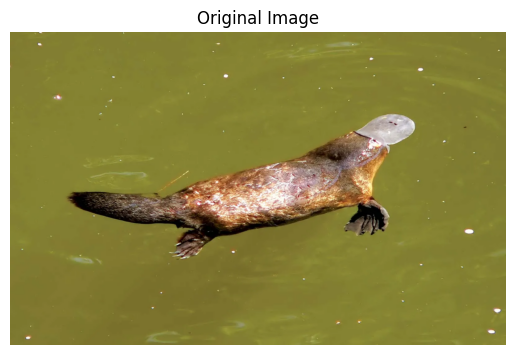

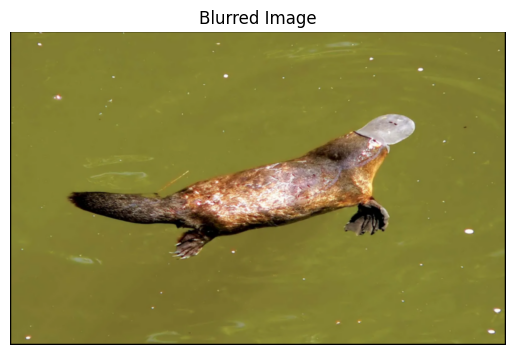

1600 1010


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def read_jpg(file_path):
    """Reads a JPG image file and converts it into a list of pixel data."""
    with Image.open(file_path) as img:
        img = img.convert('RGB')
        width, height = img.size
        pixel_data = list(img.getdata())
        pixel_data = [pixel_data[i * width:(i + 1) * width] for i in range(height)]
    return pixel_data, width, height

def apply_filter(image_data, filter_matrix):
    filter_size = len(filter_matrix)
    filter_sum = sum(map(sum, filter_matrix)) if sum(map(sum, filter_matrix)) != 0 else 1
    height = len(image_data)
    width = len(image_data[0])
    new_image_data = [[(0, 0, 0) for _ in range(width)] for _ in range(height)]

    for y in range((filter_size+1) // 2, height - (filter_size+1) // 2):
        for x in range((filter_size+1) // 2, width - (filter_size+1) // 2):
            new_pixel = [0, 0, 0]
            for fy in range(filter_size):
                for fx in range(filter_size):
                    for c in range(3):
                        new_pixel[c] += image_data[y + fy - filter_size // 2][x + fx - filter_size // 2][c] * filter_matrix[fy][fx]
            new_pixel = [max(0, min(255, int(val / filter_sum))) for val in new_pixel]
            new_image_data[y][x] = tuple(new_pixel)
    return new_image_data

def plot_image(image_data, width, height, title):
    image_flat = [tuple(pixel) for row in image_data for pixel in row]
    img = Image.new('RGB', (width, height))
    img.putdata(image_flat)

    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/HPC/platypus-duckbill-waterways-Australia.webp'
image_data, width, height = read_jpg(image_path)

blur_filter = [
    [0, 0, 1, 2, 1, 0, 0],
    [0, 3, 13, 22, 13, 3, 0],
    [1, 13, 59, 97, 59, 13, 1],
    [2, 22, 97, 159, 97, 22, 2],
    [1, 13, 59, 97, 59, 13, 1],
    [0, 3, 13, 22, 13, 3, 0],
    [0, 0, 1, 2, 1, 0, 0],
]

blurred_image = apply_filter(image_data, blur_filter)

plot_image(image_data, width, height, title="Original Image")
plot_image(blurred_image, width, height, title="Blurred Image")

print(width, height)

In [ ]:
print(len(blur_filter))


7


In [ ]:
print(image_data[0][0])

(128, 124, 46)
